In [6]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_table("data/cleaned-data.csv", sep=",")


sampled_data = df.sample(2000)

columns = ['lat', 'long']

In [25]:
sampled_data.to_csv("data/sample.csv", index=False)

In [53]:
import folium

m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

for i in range(0,len(sampled_data)):
    folium.Marker(
      location=[sampled_data.iloc[i]['lat'], sampled_data.iloc[i]['long']],
      popup=sampled_data.iloc[i]['id'],
   ).add_to(m)
    
#m

In [151]:
complete_model = AgglomerativeClustering(linkage='complete', n_clusters=8, compute_full_tree=True, compute_distances=True)
average_model = AgglomerativeClustering(linkage='average', n_clusters=130, compute_full_tree=True, compute_distances=True)
single_model = AgglomerativeClustering(linkage='single', n_clusters=8, compute_full_tree=True, compute_distances=True)

clustering_complete = complete_model.fit(sampled_data[columns])
clustering_average = average_model.fit(sampled_data[columns])
clustering_single = single_model.fit(sampled_data[columns])

complete_labels = clustering_complete.labels_
average_labels = clustering_average.labels_
single_labels = clustering_single.labels_

In [152]:
from sklearn.metrics import silhouette_score, silhouette_samples

complete_score = silhouette_score(sampled_data[columns], complete_labels)
complete_values = silhouette_samples(sampled_data[columns], complete_labels)

average_score = silhouette_score(sampled_data[columns], average_labels)
average_values = silhouette_samples(sampled_data[columns], average_labels)

single_score = silhouette_score(sampled_data[columns], single_labels)
single_values = silhouette_samples(sampled_data[columns],  single_labels)

print("Complete linkage: ", complete_score)
print("Average linkage: ", average_score)
print("Single linkage: ", single_score)

Complete linkage:  0.5177786558551757
Average linkage:  0.48479708862034226
Single linkage:  0.48761915432480746


In [56]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, lbls, title='Hierarchical Clustering Dendrogram', x_title='Flowers', **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
           model.children_,
           model.distances_,
           counts
       ]).astype(float)

    fig = plt.figure(figsize=(12, 8))
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=lbls, leaf_rotation=90)
    
    plt.title(title)
    plt.xlabel(x_title)
    plt.ylabel('Distance')
    
    fig.show()
    
    return fig

C:\Users\rsaguesriv\AppData\Local\Temp\ipykernel_8308\363053790.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\rsaguesriv\AppData\Local\Temp\ipykernel_8308\363053790.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\rsaguesriv\AppData\Local\Temp\ipykernel_8308\363053790.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


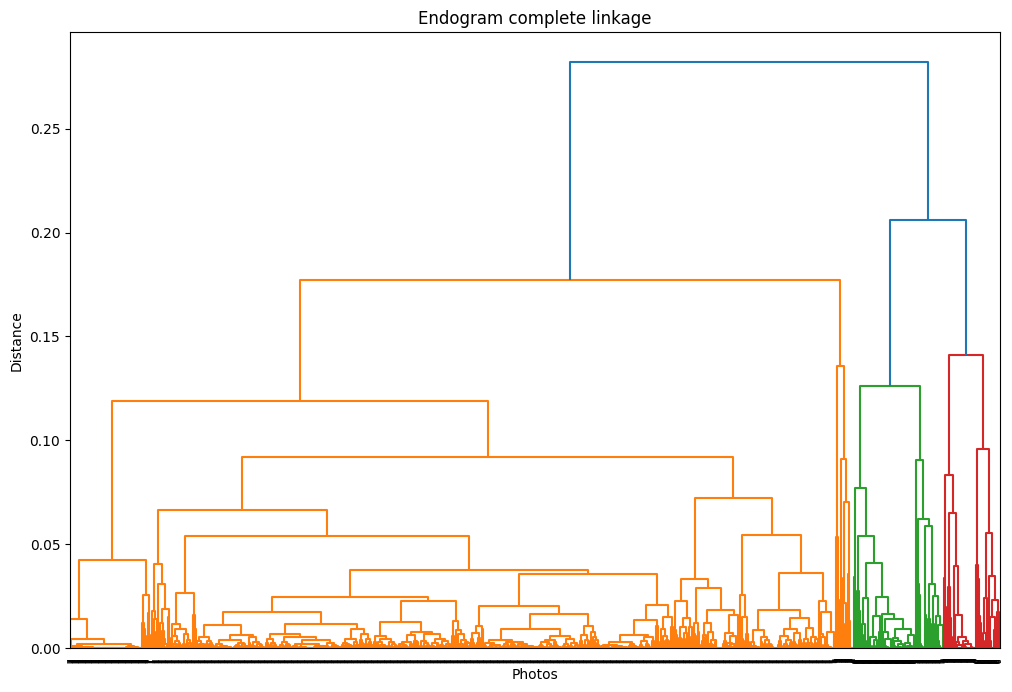

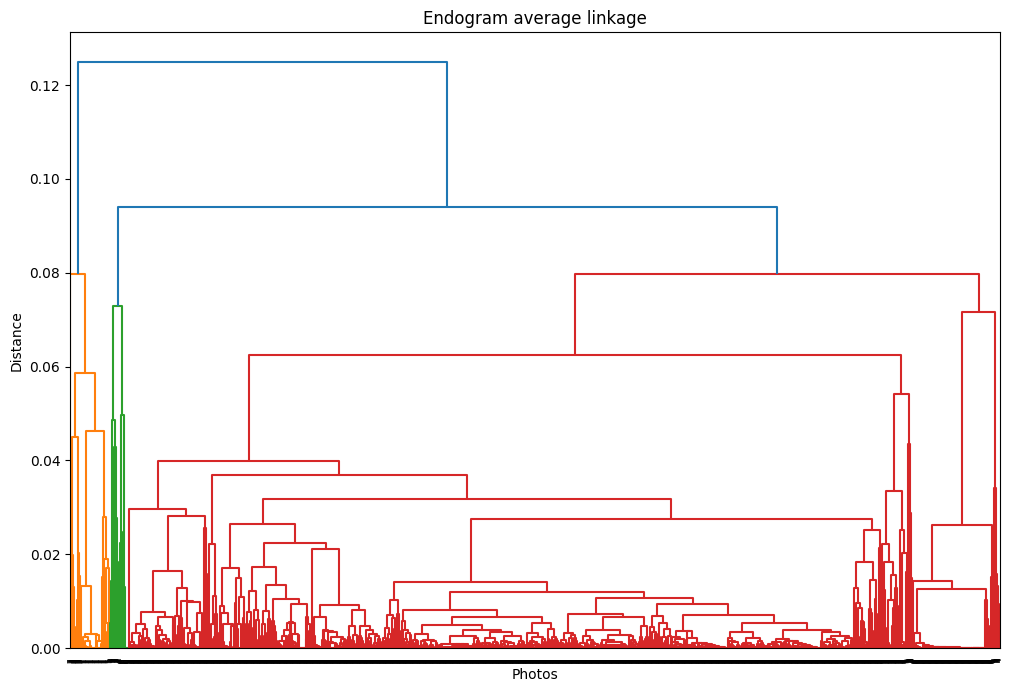

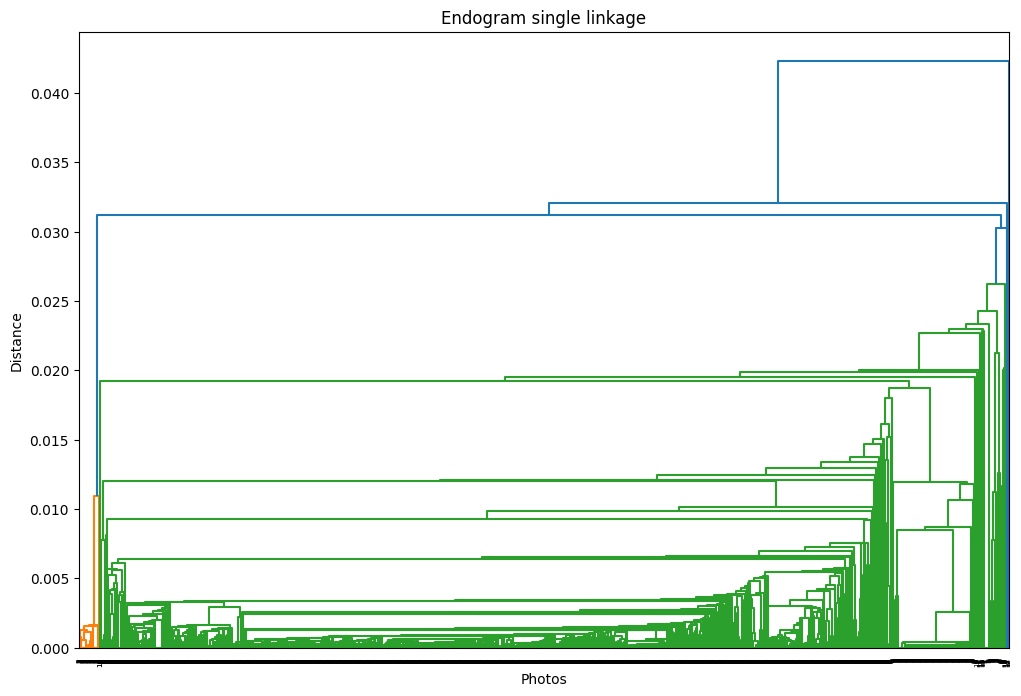

In [11]:
f = plot_dendrogram(model=complete_model, lbls=complete_labels, title="Endogram complete linkage", x_title='Photos')
f = plot_dendrogram(model=average_model, lbls=average_labels, title="Endogram average linkage", x_title='Photos')
f = plot_dendrogram(model=single_model, lbls=single_labels, title="Endogram single linkage", x_title='Photos')

In [12]:
def plot_silhouette(sample_silhouette_values, silhouette_avg, labels, n_clusters=3):
    # Create the plot
    fig = plt.figure(figsize=(10, 6))
    
    y_lower = 10
    for i in range(n_clusters):
        # Get silhouette scores for cluster i
        ith_cluster_values = sample_silhouette_values[labels == i]
        ith_cluster_values.sort()
        
        size_cluster_i = ith_cluster_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Fill the silhouette
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_values,
                         alpha=0.7)
        
        # Label the silhouette plots
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
        
        y_lower = y_upper + 10
    
    # Add vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--', 
                label=f'Average Silhouette: {silhouette_avg:.3f}')
    
    plt.title('Silhouette Plot')
    plt.xlabel('Silhouette Coefficient')
    plt.ylabel('Cluster')
    plt.legend(loc='best')
    plt.tight_layout()
    
    return fig

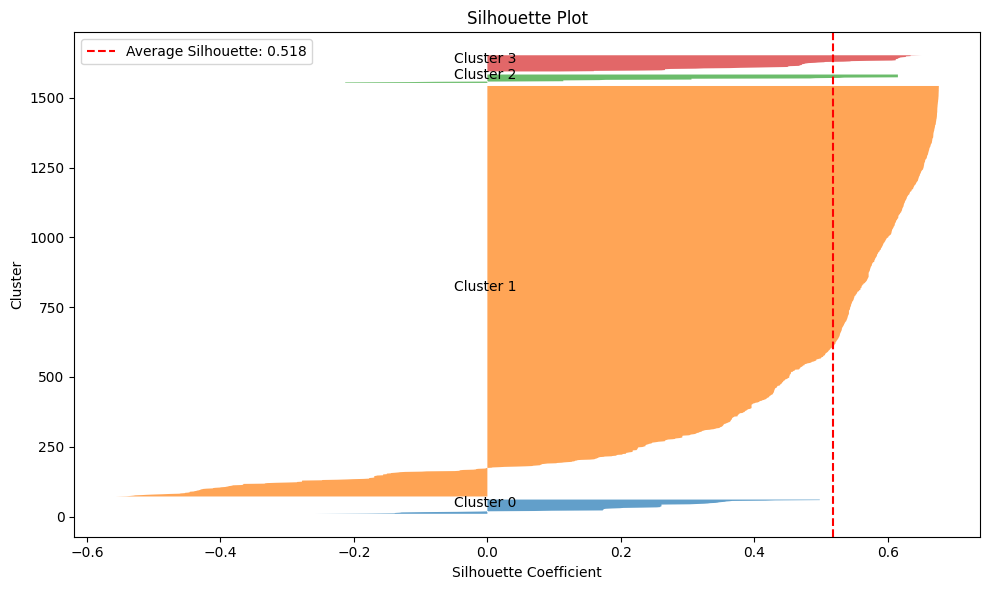

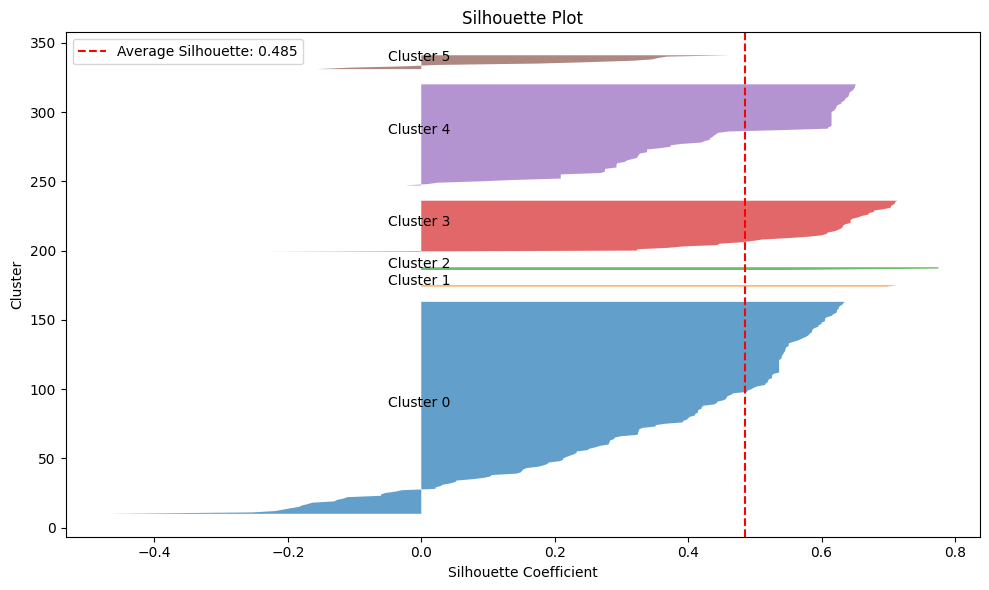

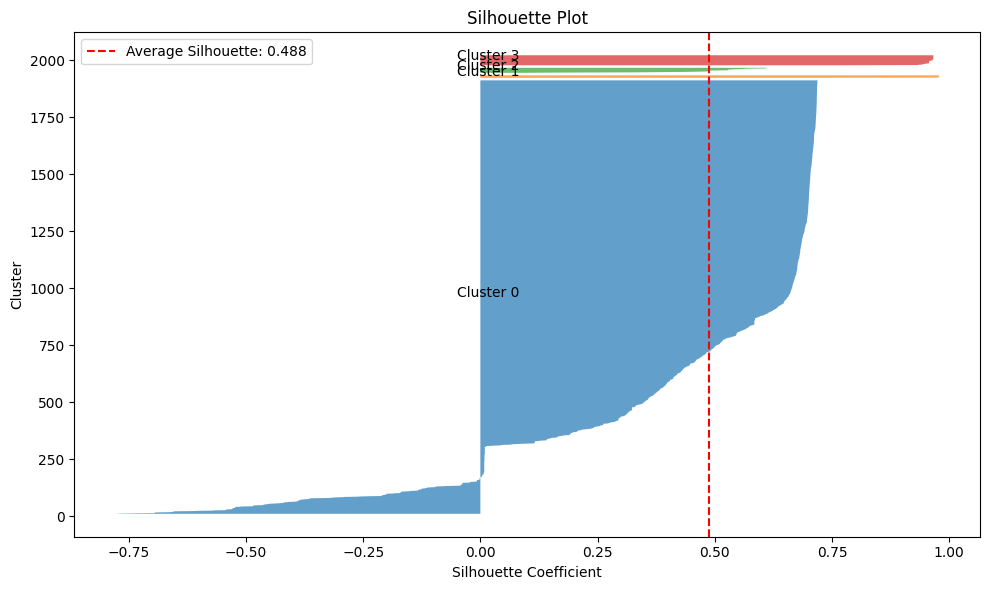

In [153]:
a = plot_silhouette(complete_values, complete_score, complete_labels, 4)
a = plot_silhouette(average_values, average_score, average_labels, 6)
a = plot_silhouette(single_values, single_score, single_labels, 4)

In [156]:
sampled_data['complete labels'] = complete_labels
sampled_data['average labels'] = average_labels
sampled_data['single labels'] = single_labels

clusters = ['complete labels', 'average labels', 'single labels']
maps = []

map_sample = sampled_data.sample(1000)

colors = ['darkred', 'green', 'lightgray', 'red', 'lightblue', 'darkblue', 'lightgreen', 'cadetblue', 'black', 'blue', 'orange', 'purple', 'pink', 'lightred', 'gray', 'darkgreen', 'darkpurple', 'beige', 'white']

for cluster in clusters:
   m = folium.Map(location=[45.70,4.80], tiles="OpenStreetMap", zoom_start=10)
   for i in range(0,len(map_sample)):
      color = colors[map_sample.iloc[i][cluster] % len(colors)]
      folium.Marker(
         location=[map_sample.iloc[i]['lat'], map_sample.iloc[i]['long']],
         popup=map_sample.iloc[i][cluster],
         icon=folium.Icon(color = color)
      ).add_to(m)
   maps.append(m)


In [128]:
maps[0]

In [157]:
maps[1]

In [62]:
maps[2]